In [49]:
import csv
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris



In [50]:
iris = load_iris()
data = iris['data']
target = iris['target']




In [51]:
def split_data(data, target, test_size=0.2):
    combined = list(zip(data, target))
    random.shuffle(combined)
    split_idx = int(len(combined) * (1 - test_size))
    train_data, test_data = combined[:split_idx], combined[split_idx:]

    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)




In [52]:
def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))




In [53]:
def knn(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:

        distances = [(euclidean_distance(test_point, train_point), label) for train_point, label in zip(X_train, y_train)]

        k_nearest_neighbors = sorted(distances, key=lambda x: x[0])[:k]

        most_common_class = Counter([label for _, label in k_nearest_neighbors]).most_common(1)[0][0]
        predictions.append(most_common_class)
    return predictions




In [54]:
def accuracy(y_true, y_pred):
    return np.mean(np.array(y_true) == np.array(y_pred))




In [55]:
def confusion_matrix(y_true, y_pred, num_classes=3):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label][pred_label] += 1
    return matrix




In [56]:
X_train, y_train, X_test, y_test = split_data(data, target)




In [57]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    y_pred = knn(X_train, y_train, X_test, k)
    acc = accuracy(y_test, y_pred)
    accuracies.append(acc)




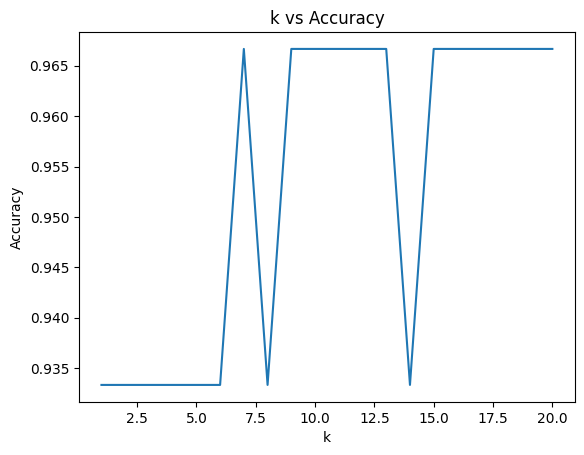

In [58]:
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.show()



In [59]:
best_k = k_values[np.argmax(accuracies)]


best_y_pred = knn(X_train, y_train, X_test, best_k)
conf_matrix = confusion_matrix(y_test, best_y_pred)

best_k, max(accuracies), conf_matrix

(7,
 0.9666666666666667,
 array([[14,  0,  0],
        [ 0,  7,  0],
        [ 0,  1,  8]]))

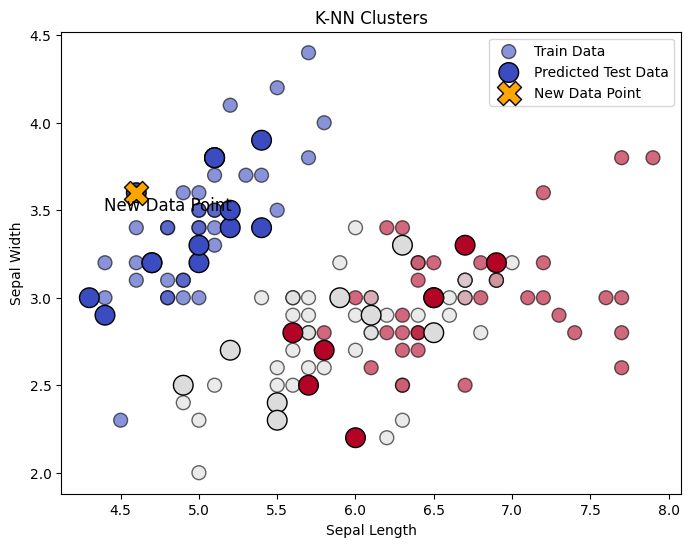

In [60]:
def plot_clusters(X_train, X_test, y_true, y_pred):
    plt.figure(figsize=(8, 6))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train Data', edgecolor='k', alpha=0.6, s=100)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='o', label='Predicted Test Data', edgecolor='k', s=200)

    new_point = X_test[0]
    plt.scatter(new_point[0], new_point[1], color='orange', label='New Data Point', edgecolor='black', s=300, marker='X')


    plt.text(new_point[0] + 0.2, new_point[1] - 0.1, "New Data Point", fontsize=12, color='black', ha='center')

    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('K-NN Clusters')
    plt.legend()
    plt.show()

plot_clusters(X_train, X_test, y_test, best_y_pred)
